# Quickly visualizing MI between feature map activations of the trained network

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_selection

from lecun1989repro import utils

# "Modern" replication

In [2]:
acts = utils.read_h5_dict("../out/modern/activations/activations_test.h5")

In [3]:
acts["h1"].shape

(2007, 12, 8, 8)

In [4]:
def mutual_info(acts, i, j):
    feature_map_i = acts[:, i, :, :].reshape(-1, 1)
    feature_map_j = acts[:, j, :, :].ravel()
    
    return feature_selection.mutual_info_regression(feature_map_i, feature_map_j)


def feature_map_MI(acts):
    num_maps = acts.shape[1]
    
    matrix = np.zeros((num_maps, num_maps), dtype=np.float32)
    for i in range(num_maps):
        for j in range(i, acts.shape[1]):
            matrix[i, j] = mutual_info(acts, i, j)[0]
    
    # fill in the redundant entries
    for i in range(num_maps):
        for j in range(num_maps):
            if i > j:
                matrix[i, j] = matrix[j, i]
    
    return matrix

In [5]:
%time MI_h1 = feature_map_MI(acts["h1"])

CPU times: user 1min 12s, sys: 1.23 s, total: 1min 13s
Wall time: 1min 14s


In [6]:
%time MI_h2 = feature_map_MI(acts["h2"])

CPU times: user 9.23 s, sys: 36.6 ms, total: 9.27 s
Wall time: 9.29 s


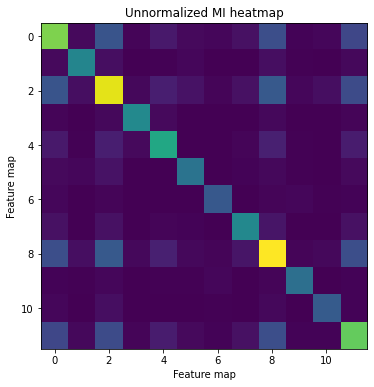

In [7]:
plt.figure(figsize=(7, 6))

plt.imshow(MI_h1)
plt.title("Unnormalized MI heatmap")
plt.xlabel("Feature map")
plt.ylabel("Feature map")

plt.show()

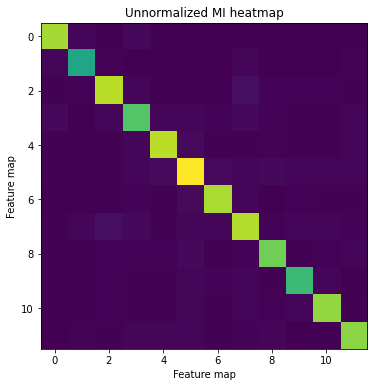

In [8]:
plt.figure(figsize=(7, 6))

plt.imshow(MI_h2)
plt.title("Unnormalized MI heatmap")
plt.xlabel("Feature map")
plt.ylabel("Feature map")

plt.show()

# "Base" model

In [9]:
acts = utils.read_h5_dict("../out/base/activations/activations_test.h5")

In [10]:
%time MI_h1 = feature_map_MI(acts["h1"])

CPU times: user 1min 9s, sys: 1.04 s, total: 1min 10s
Wall time: 1min 10s


In [11]:
%time MI_h2 = feature_map_MI(acts["h2"])

CPU times: user 8.75 s, sys: 19.8 ms, total: 8.77 s
Wall time: 8.79 s


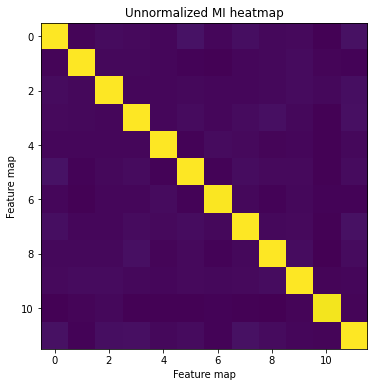

In [12]:
plt.figure(figsize=(7, 6))

plt.imshow(MI_h1)
plt.title("Unnormalized MI heatmap")
plt.xlabel("Feature map")
plt.ylabel("Feature map")

plt.show()

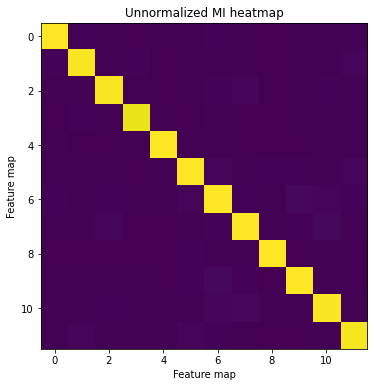

In [13]:
plt.figure(figsize=(7, 6))

plt.imshow(MI_h2)
plt.title("Unnormalized MI heatmap")
plt.xlabel("Feature map")
plt.ylabel("Feature map")

plt.show()